In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers
## on quizzes as we set up

In [2]:
df=pd.read_csv('/Users/balance/Desktop/Udacity Data Analasisi/Udacity_DataAnalysis-3/AnalyzeABTestResults 2 2/ab_data.csv')

In [3]:
df.shape

(294478, 5)

In [4]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
df.converted.describe()

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

In [7]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [8]:
df['converted'].value_counts()[1]/df['user_id'].nunique()

0.12126269856564711

In [9]:
df.groupby('landing_page')['group'].value_counts().unstack().fillna(0)

group,control,treatment
landing_page,,
new_page,1928,145311
old_page,145274,1965


In [10]:
sample_data=df.sample(400)

In [12]:
sample_data.shape

(400, 5)

In [13]:
sample_data

,user_id,timestamp,group,landing_page,converted
218555,703431,2017-01-23 22:21:09.589234,control,old_page,0
84812,854246,2017-01-07 20:18:56.217612,treatment,new_page,0
87498,750558,2017-01-09 20:34:43.917806,control,old_page,0
32755,783810,2017-01-20 12:45:27.419008,control,old_page,0
192758,926124,2017-01-12 21:03:37.855866,control,old_page,1
...,...,...,...,...,...
56132,850287,2017-01-07 04:58:51.400321,control,old_page,0
186045,845061,2017-01-17 08:56:11.539144,control,old_page,0
112575,937516,2017-01-08 16:05:13.625768,control,old_page,0
191966,814803,2017-01-21 05:34:20.811436,control,old_page,1


In [58]:
hi=sample_data.sample(5,replace=True)

In [59]:
hi

,user_id,timestamp,group,landing_page,converted
260734,793143,2017-01-09 12:17:22.903027,treatment,new_page,0
56013,935842,2017-01-03 14:18:58.225602,control,old_page,0
205976,931319,2017-01-23 11:26:57.253521,control,old_page,0
111520,810021,2017-01-09 18:19:36.835061,control,old_page,0
204668,644713,2017-01-23 16:29:52.456144,control,old_page,0


In [62]:
hi1=[]

for _ in range(10):
    hi=sample_data.sample(5,replace=True)
    hi1.append(hi)

In [63]:
hi1

[        user_id                   timestamp      group landing_page  converted
 283806   651772  2017-01-09 23:52:48.052429  treatment     new_page          0
 66819    837610  2017-01-17 07:22:37.973404    control     old_page          0
 154602   688333  2017-01-08 20:25:44.664890    control     old_page          0
 167157   679574  2017-01-10 08:29:38.478029    control     old_page          0
 66819    837610  2017-01-17 07:22:37.973404    control     old_page          0,
         user_id                   timestamp      group landing_page  converted
 163781   751321  2017-01-08 14:16:09.025901    control     old_page          1
 290636   729482  2017-01-05 13:36:59.482980    control     old_page          0
 192758   926124  2017-01-12 21:03:37.855866    control     old_page          1
 122173   923833  2017-01-05 11:15:03.936520  treatment     new_page          1
 287616   693962  2017-01-23 06:08:13.596270    control     old_page          0,
         user_id                   tim

In [68]:
sample_old2, sample_new2, diffs = [], [], []

for _ in range(10000):
    
    
    bootsample=sample_data.sample(400,replace=True)
    sample_old1=bootsample[(bootsample["landing_page"]=="old_page")].converted.mean()
    sample_new1 = bootsample[(bootsample["landing_page"]=="new_page")].converted.mean()
    sample_old2.append(sample_old1)
    sample_new2.append(sample_new1)
    diffs.append(sample_new1-sample_old1)

In [69]:
np.std(sample_old2),np.std(sample_new2),np.std(diffs)

(0.0218081999961563, 0.026004839785277543, 0.034044199635870756)

In [71]:
sample_old2

([0.09389671361502347,
  0.13526570048309178,
  0.10909090909090909,
  0.11224489795918367,
  0.15695067264573992,
  0.10377358490566038,
  0.11734693877551021,
  0.09090909090909091,
  0.09905660377358491,
  0.11557788944723618,
  0.13725490196078433,
  0.1523809523809524,
  0.10552763819095477,
  0.11574074074074074,
  0.13452914798206278,
  0.06763285024154589,
  0.13004484304932734,
  0.07804878048780488,
  0.08629441624365482,
  0.08374384236453201,
  0.11162790697674418,
  0.1388888888888889,
  0.14977973568281938,
  0.10526315789473684,
  0.09900990099009901,
  0.08530805687203792,
  0.06435643564356436,
  0.12254901960784313,
  0.14349775784753363,
  0.13392857142857142,
  0.1004566210045662,
  0.1497584541062802,
  0.10377358490566038,
  0.12962962962962962,
  0.10204081632653061,
  0.12437810945273632,
  0.105,
  0.11650485436893204,
  0.1145374449339207,
  0.12558139534883722,
  0.13679245283018868,
  0.08597285067873303,
  0.11607142857142858,
  0.11374407582938388,
  0.142

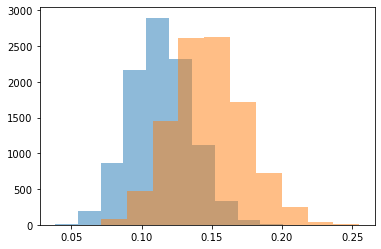

In [72]:
plt.hist(sample_old2, alpha = 0.5);
plt.hist(sample_new2, alpha = 0.5);

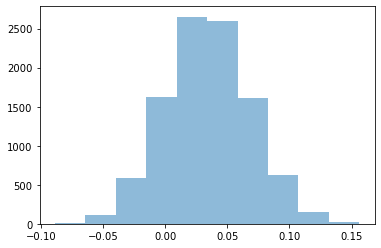

In [75]:
plt.hist(diffs, alpha = 0.5); 

# again normal - this is by the central limit theorem